Build a regression model.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  

Provide model output and an interpretation of the results. 

In [24]:
#Path for the csv model dataset
csv_file_path = "../Downloads/allcolumns.csv"

# Save the DataFrame to CSV
columns_set.to_csv(csv_file_path, index=False)  

In [25]:
columns_set = pd.read_csv("../Downloads/allcolumns.csv")
columns_set 

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
0,8.95,672.1,4.45,1095.135294,20
1,8.39,840.8,4.45,1095.135294,1
2,8.66,711.7,4.45,1095.135294,10
3,8.78,549.4,4.45,1095.135294,2
4,9.23,760.7,4.45,1095.135294,0
...,...,...,...,...,...
498,8.03,562.5,4.45,1095.135294,6
499,8.74,480.8,4.45,1095.135294,14
500,9.18,646.4,4.45,1095.135294,35
501,8.49,651.6,4.45,1095.135294,24


In [55]:
correlation_matrix = columns_set.corr(numeric_only=True)
correlation_matrix 
correlation_matrix = correlation_matrix.fillna(0) 
correlation_matrix    

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
Average_rating_F,1.000000,-0.033493,0.0,0.0,-0.010729
Average_dist_F,-0.033493,1.000000,0.0,0.0,-0.055675
Average_rating_Y,0.000000,0.000000,0.0,0.0,0.000000
Average_distance_Y,0.000000,0.000000,0.0,0.0,0.000000
Number of Bikes,-0.010729,-0.055675,0.0,0.0,1.000000


In [56]:
y = correlation_matrix['Number of Bikes']
X = correlation_matrix[['Average_distance_Y', 'Average_rating_F', 'Average_dist_F']]
X = sm.add_constant(X)  # to get a column of 1's as the intercept
X.head()         

,const,Average_distance_Y,Average_rating_F,Average_dist_F
Average_rating_F,1.0,0.0,1.000000,-0.033493
Average_dist_F,1.0,0.0,-0.033493,1.000000
Average_rating_Y,1.0,0.0,0.000000,0.000000
Average_distance_Y,1.0,0.0,0.000000,0.000000
Number of Bikes,1.0,0.0,-0.010729,-0.055675


In [58]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (for ordinary least squares (OLS) is run) 
print(results.summary())          

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                 -0.523
Method:                 Least Squares   F-statistic:                    0.3135
Date:                Tue, 26 Sep 2023   Prob (F-statistic):              0.761
Time:                        07:19:10   Log-Likelihood:                -1.9201
No. Observations:                   5   AIC:                             9.840
Df Residuals:                       2   BIC:                             8.669
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3383      0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# Interpretation Summary
Overall, the model suggests that the characteristics of the POIs do not show statistically significant impact on the estimated Number of bikes for a given station. 

However the Adj. R-squared indicating the goodness of fit of the model shows that 50% of the variability in Number of bikes can be explained by the independent variables.

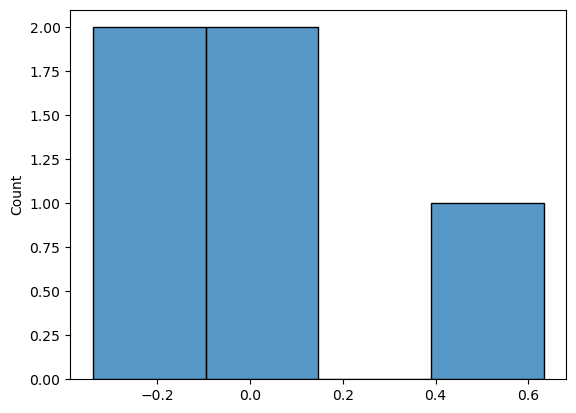

In [45]:
residuals = results.resid

sns.histplot(residuals)
plt.show()   

In [59]:
# To extract the co-efficients
results.params   

const                 3.383010e-01
Average_distance_Y   -7.757713e-17
Average_rating_F     -3.718136e-01
Average_dist_F       -4.419444e-01
dtype: float64

In [60]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F
b0 = results.params['const']
b1 = results.params['Average_distance_Y']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

#For
known_distance_Y = 900
known_rating = 9
known_dist_F = 800
predicted_num_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F #where 1 is fitted constant
predicted_num_bikes   
 
 

-356.5635802608331

# Stretch

How can you turn the regression model into a classification model?